<a href="https://colab.research.google.com/github/rizvenhabibi/UAS_Visi_Komputer_rizven/blob/main/ekstraksi_tekstur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


Fungsi untuk menghitung Local Binary Pattern pada suatu piksel dalam gambar
num_points: Jumlah titik tetangga yang digunakan dalam LBP
radius: Jarak tetangga yang digunakan dalam LBP

In [ ]:
def local_binary_pattern(image, num_points, radius):
    lbp_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            binary_string = ''
            for n in range(num_points):
                 # Hitung koordinat tetangga pada lingkaran berdasarkan num_points dan radius
                x = int(j + radius * np.cos(2 * np.pi * n / num_points))
                y = int(i - radius * np.sin(2 * np.pi * n / num_points))
                # Jika koordinat tetangga berada dalam batas gambar, tentukan nilai bit LBP
                if 0 <= x < image.shape[1] and 0 <= y < image.shape[0]:
                    binary_string += '1' if image[y, x] >= image[i, j] else '0'
                else:
                    binary_string += '0'
            # Konversi binary_string menjadi bilangan bulat dan simpan dalam lbp_image
            lbp_image[i, j] = int(binary_string, 2)
    return lbp_image


membuka gambar pada lokasi tertentu
konversi gambar jadi abu-abu

In [ ]:
image_path = 'sample_data/bunga.jpg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [ ]:
num_points = 24  # Jumlah titik tetangga yang digunakan dalam LBP
radius = 3  # Jarak tetangga yang digunakan dalam LBP
lbp_image = local_binary_pattern(gray_image, num_points, radius)


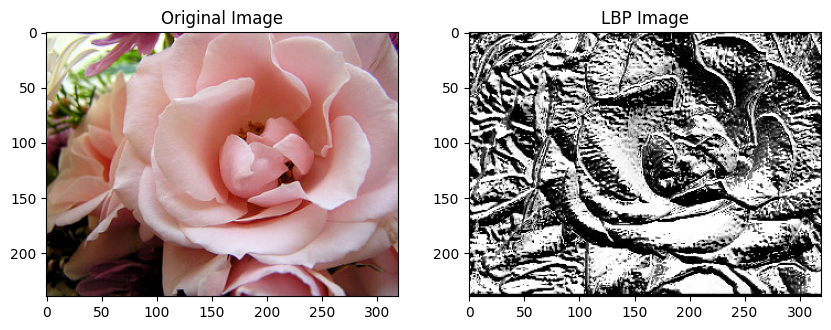

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(lbp_image, cmap='gray')
plt.title('LBP Image')

plt.show()
